In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob
import pickle
import nibabel as nib
from nibabel import Nifti1Image

from nilearn.datasets import fetch_atlas_destrieux_2009, fetch_atlas_surf_destrieux
from nilearn.plotting import view_img

from utils import TWO_STAGE_GLM_DATA_DIR
from analyses.ridge_regression_decoding import REGIONS_ANGULAR_GYRUS


In [2]:
MODE = "train"
SUBJECT = "sub-07"
fmri_addresses_regex = os.path.join(TWO_STAGE_GLM_DATA_DIR, SUBJECT, f'betas_{MODE}*', '*.nii')
fmri_betas_addresses = np.array(sorted(glob(fmri_addresses_regex)))
fmri_betas_address = fmri_betas_addresses[0]

gray_matter_mask_address = os.path.join(os.path.join(TWO_STAGE_GLM_DATA_DIR, SUBJECT), f'unstructured', 'mask.nii')
gray_matter_mask_img = nib.load(gray_matter_mask_address)
gray_matter_mask_ras = nib.as_closest_canonical(gray_matter_mask_img)
gray_matter_mask_ras_data = gray_matter_mask_ras.get_fdata()
gray_matter_mask = gray_matter_mask_ras_data == 1
gray_matter_mask.sum()

214739

In [3]:
print(fmri_betas_address)
sample_img = nib.load(fmri_betas_address)
sample_img = nib.as_closest_canonical(sample_img)
img_data = sample_img.get_fdata()


/home/mitja/data/multimodal_decoding/fmri/glm_manual/two-stage-mni/sub-07/betas_train_captions/beta_C000307.nii


In [4]:
destrieux_atlas = fetch_atlas_destrieux_2009()
label_to_value_dict = {label[1]: int(label[0]) for label in destrieux_atlas['labels']}

values = [label_to_value_dict[label] for label in REGIONS_ANGULAR_GYRUS]
atlas_map = nib.load(destrieux_atlas.maps)

atlas_map_data = atlas_map.get_fdata()

roi_mask = np.isin(atlas_map_data, values)
roi_mask.sum()

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/datasets/atlas.py:354: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


2035

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



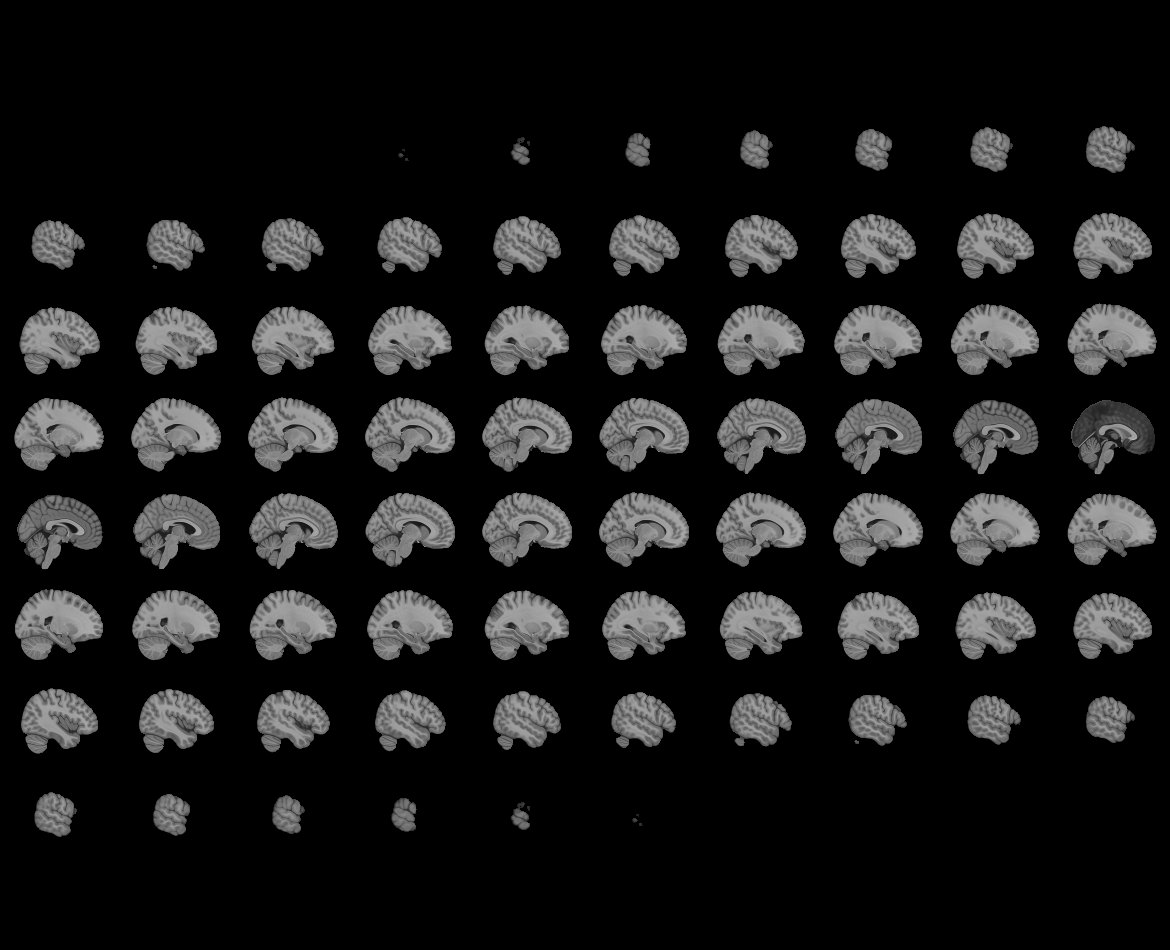
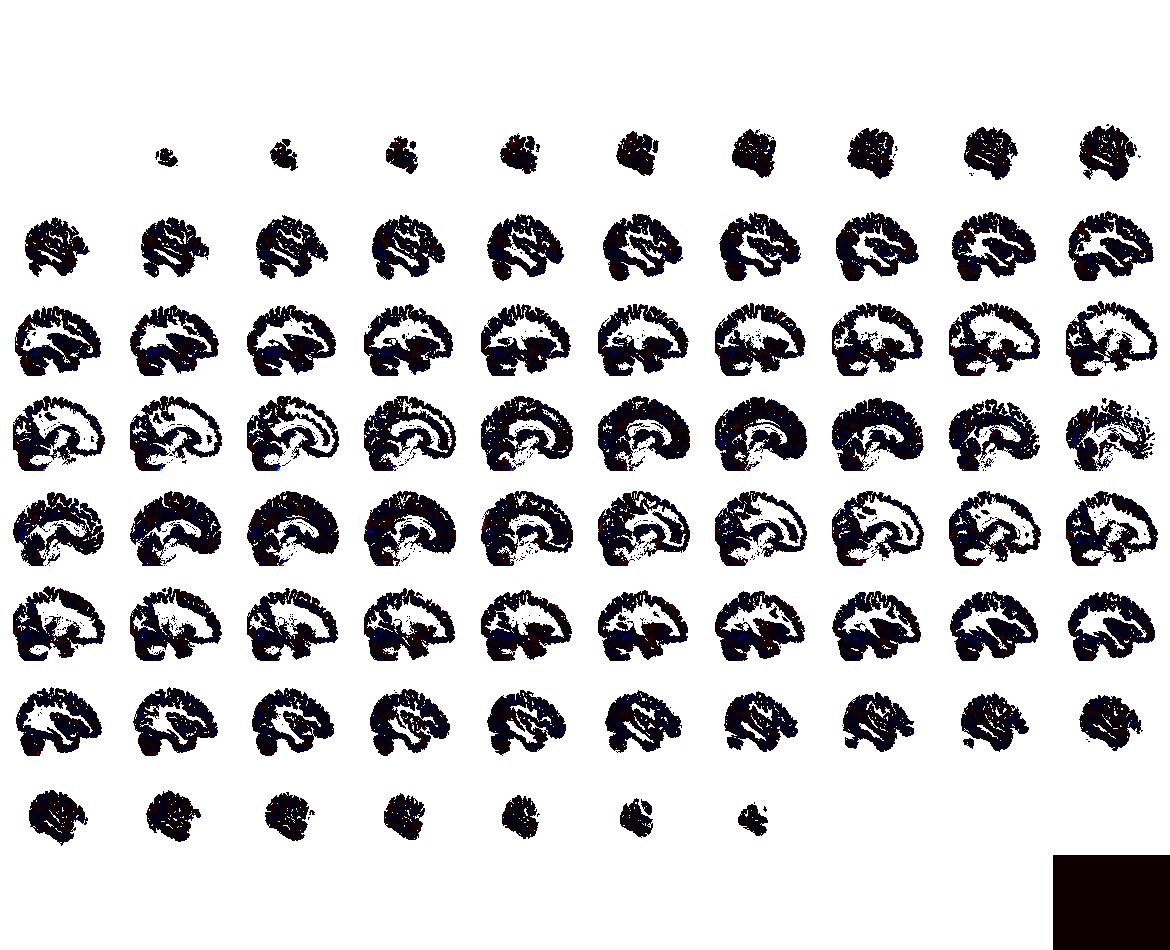

In [5]:
view_img(sample_img)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:591: UserWarning: Casting data from int32 to float32
  warnings.warn(f"Casting data from {data.dtype.name} to {aux}")



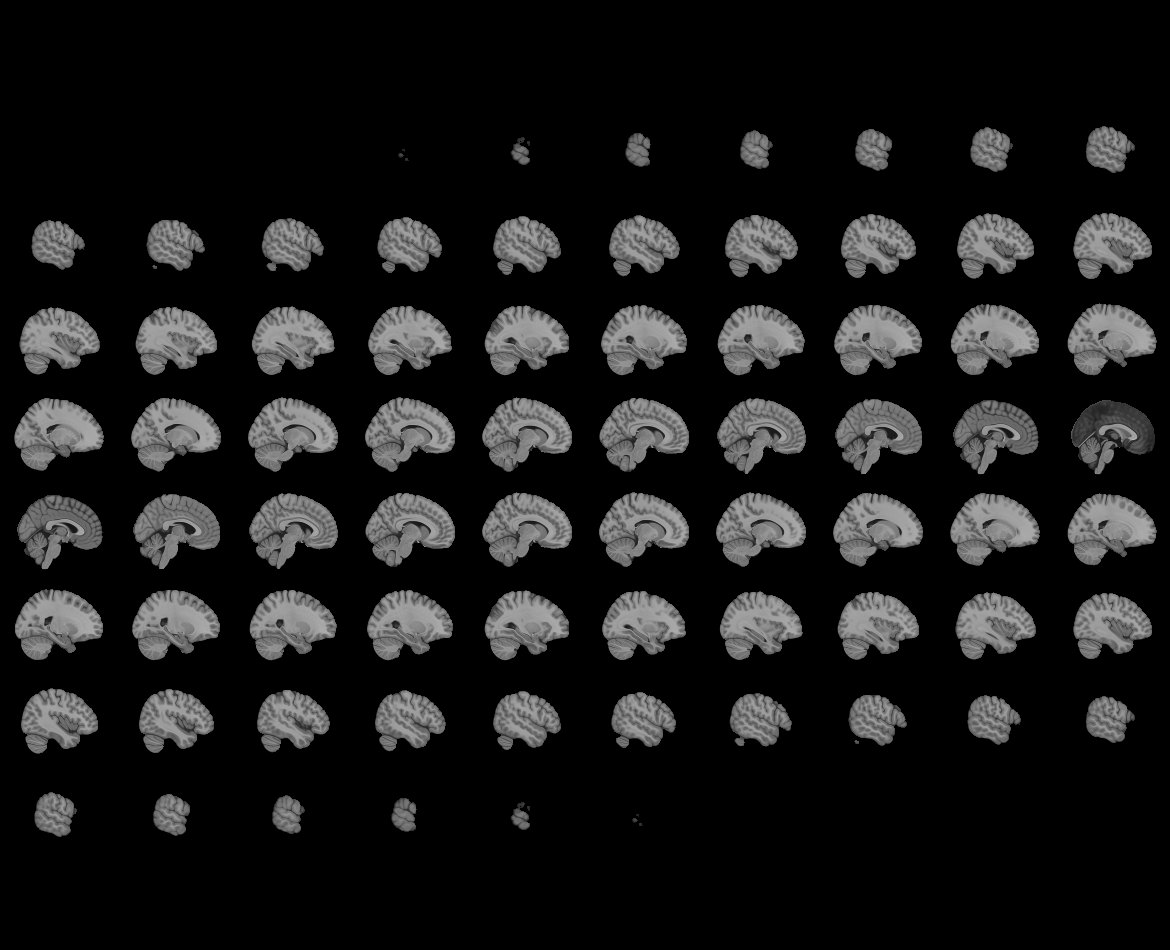
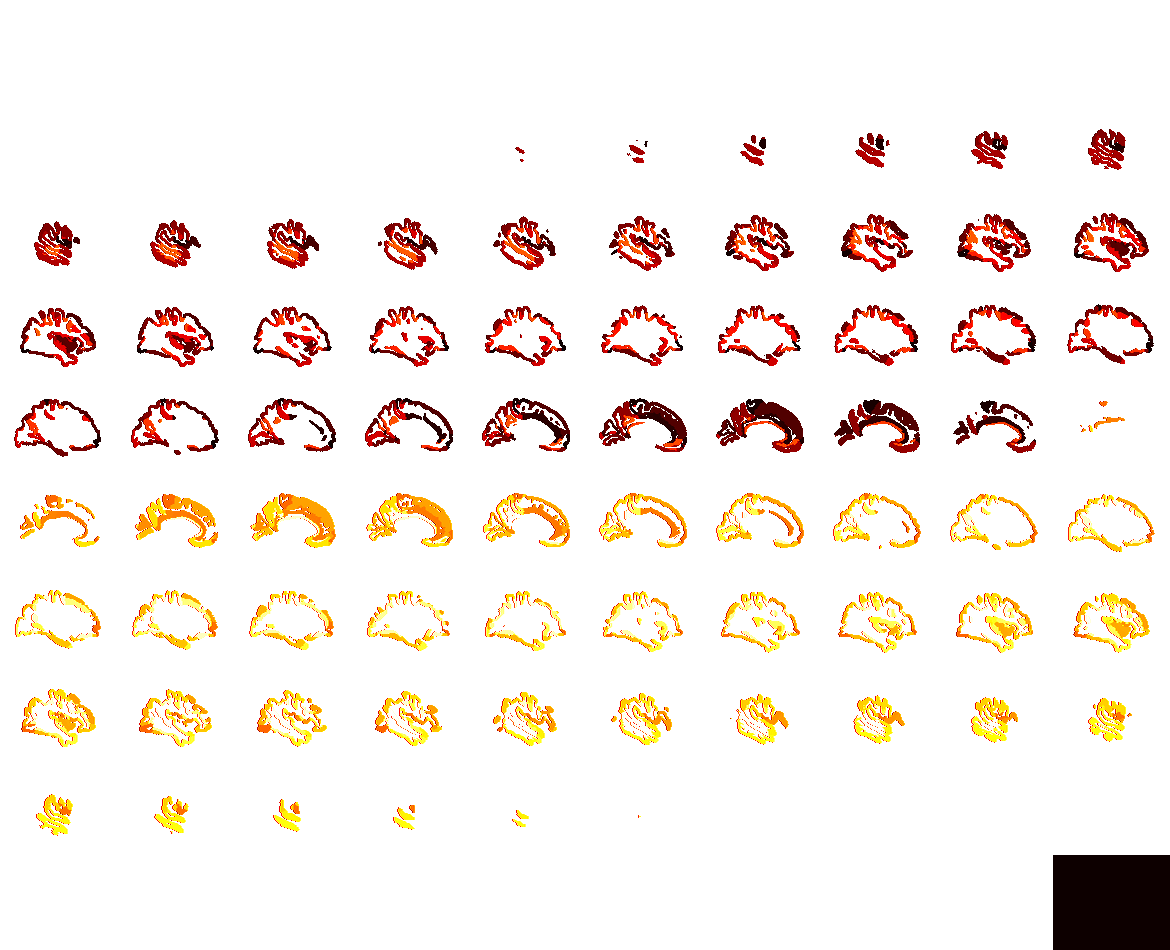

In [6]:
view_img(atlas_map)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



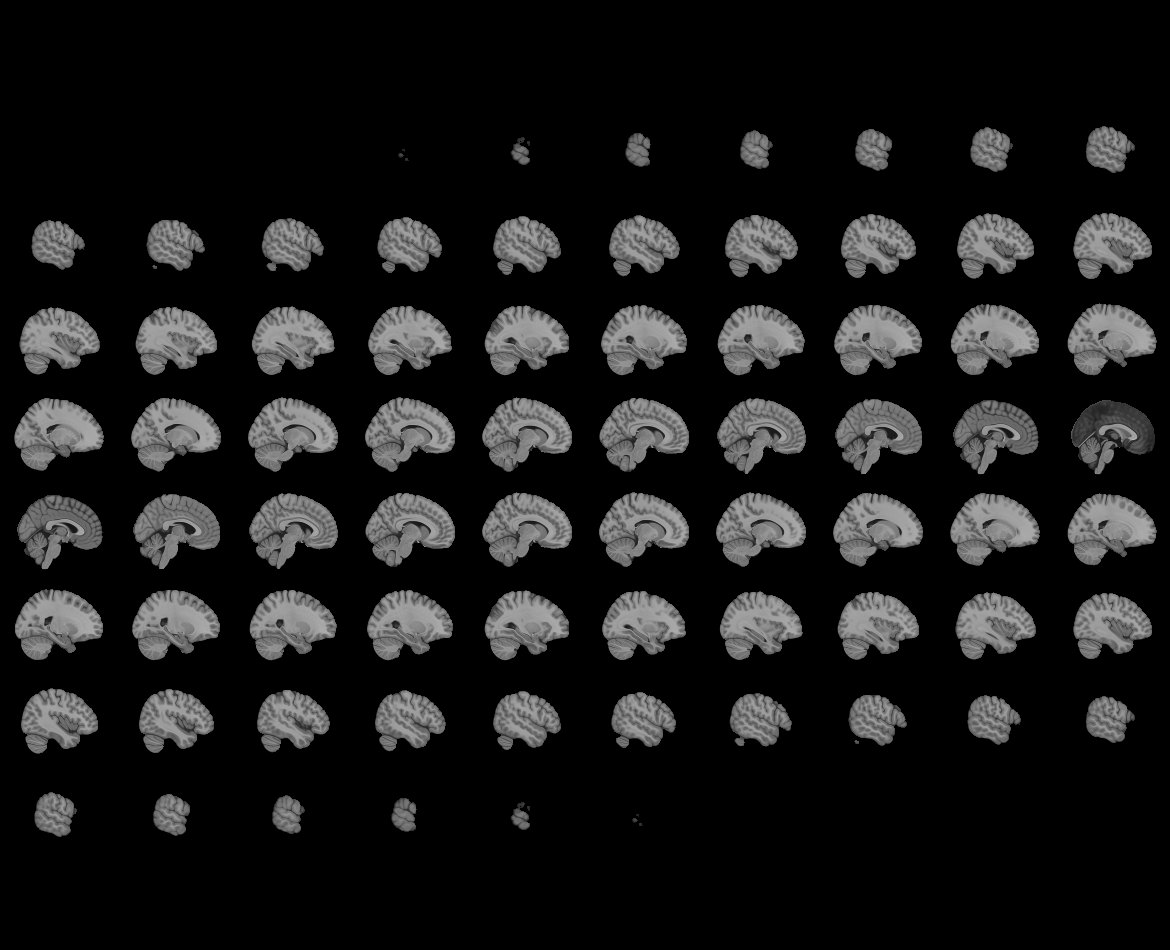
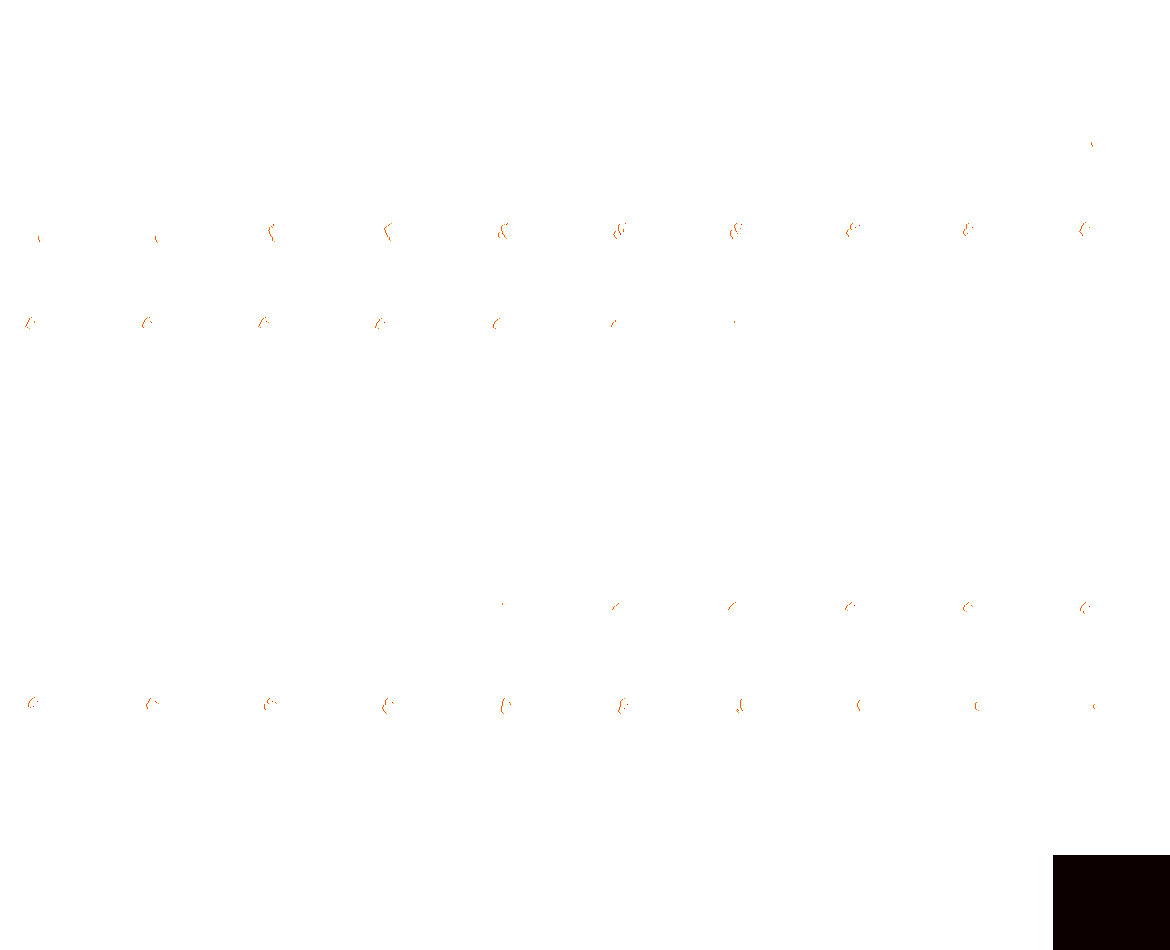

In [7]:
roi_mask_img = Nifti1Image(roi_mask*1.0, affine=atlas_map.affine)
view_img(roi_mask_img)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



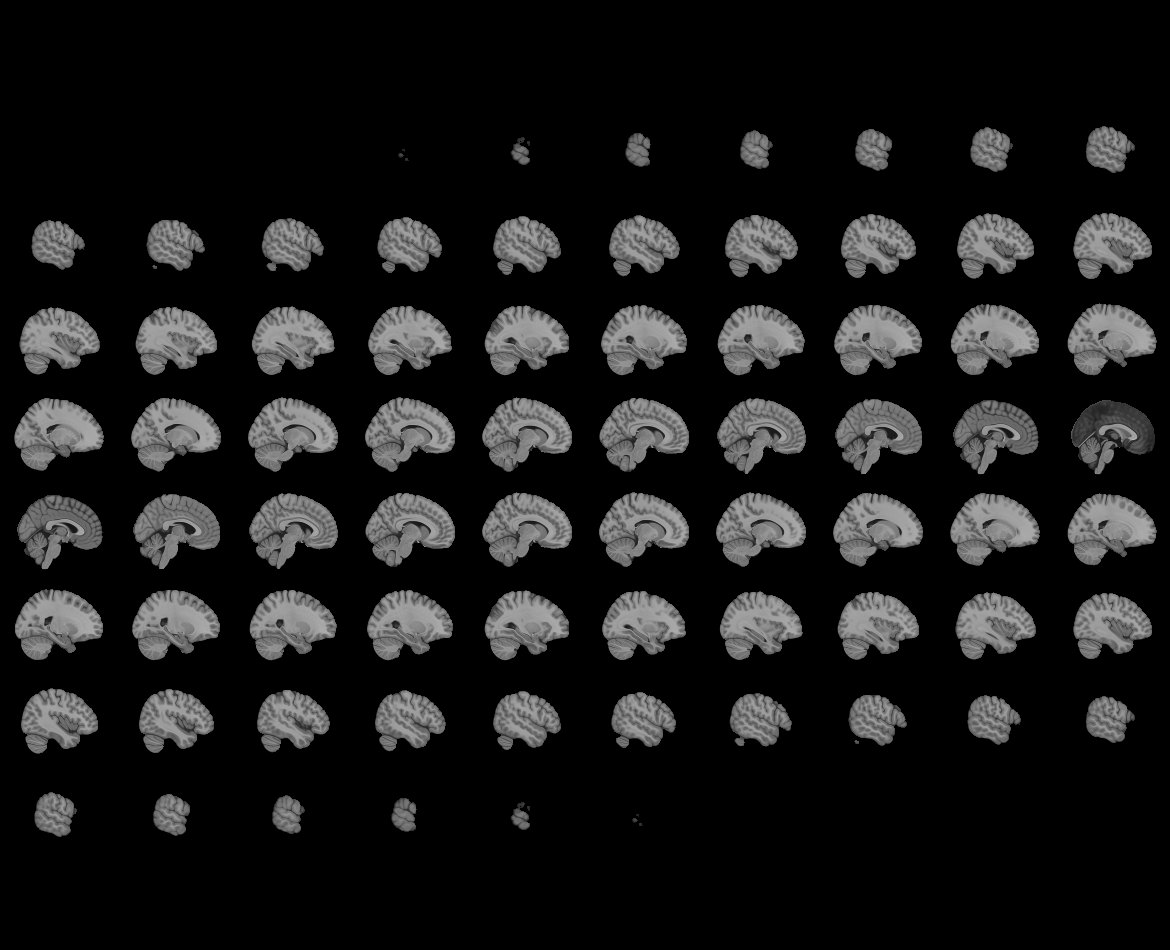
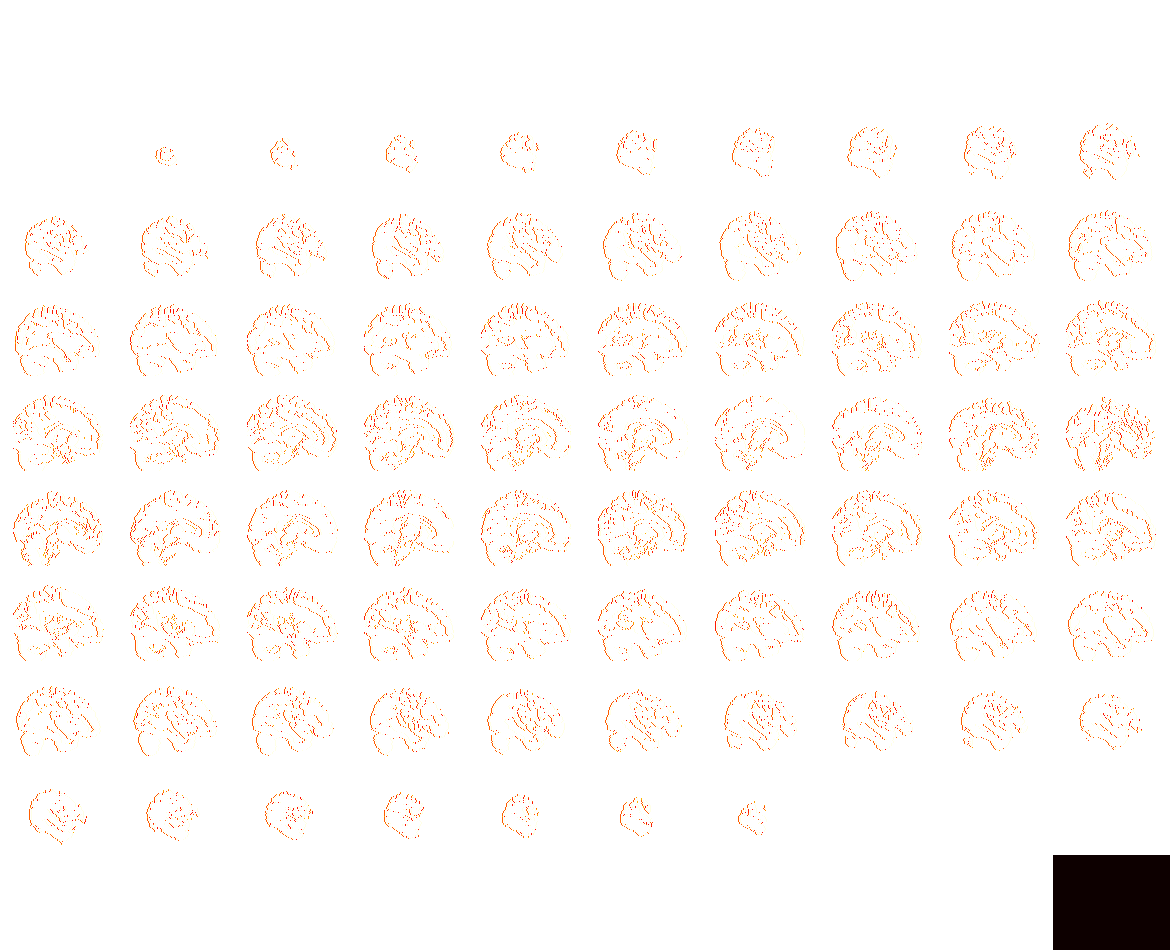

In [8]:
gray_matter_mask_img = Nifti1Image(gray_matter_mask*1.0, affine=atlas_map.affine)
view_img(gray_matter_mask_img)

In [9]:
mask = roi_mask & gray_matter_mask
mask_img = Nifti1Image(mask*1.0, affine=atlas_map.affine)
view_img(mask_img)
mask.sum()

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(


1945

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



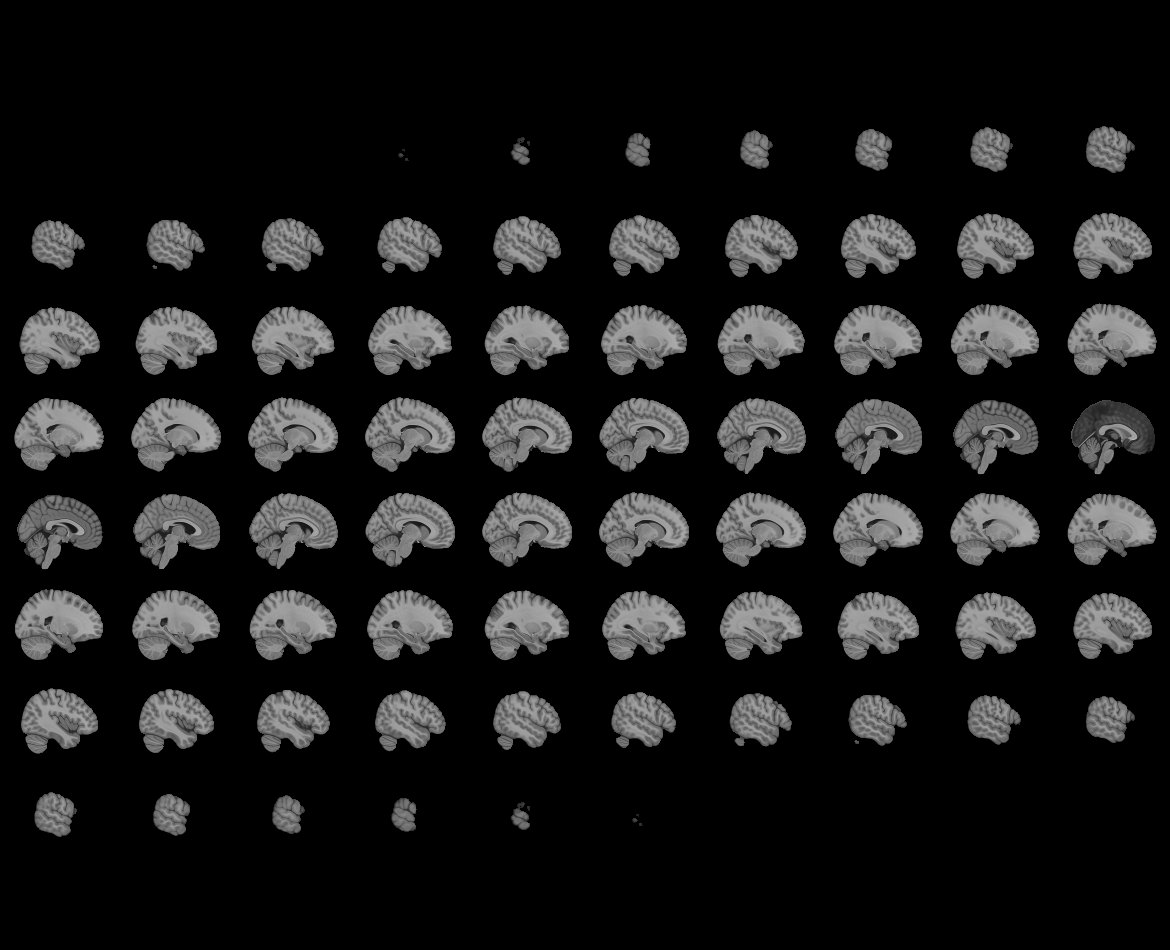
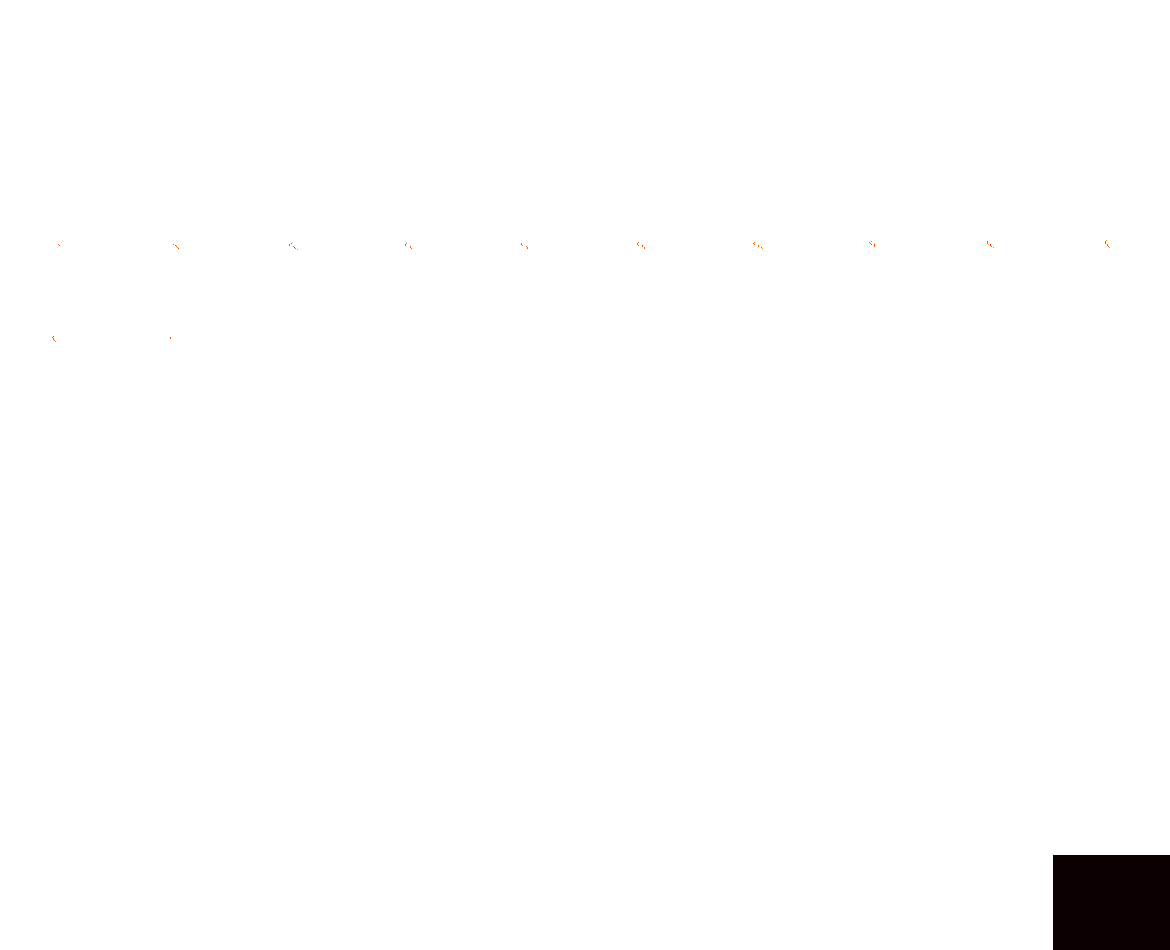

In [10]:
REGIONS = ['L G_temp_sup-G_T_transv']

values = [label_to_value_dict[label] for label in REGIONS]

test_mask = np.isin(atlas_map_data, values)
test_mask_img = Nifti1Image(test_mask*1.0, affine=atlas_map.affine)
view_img(test_mask_img)

In [11]:
from analyses.ridge_regression_decoding import REGIONS_HIGH_LEVEL_VISUAL, REGIONS_OCCIPITAL_EXCLUSIVE, REGIONS_LANGUAGE
values = [label_to_value_dict[label] for label in REGIONS_HIGH_LEVEL_VISUAL]
test_mask_1 = np.isin(atlas_map_data, values) * 1

values = [label_to_value_dict[label] for label in REGIONS_OCCIPITAL_EXCLUSIVE]
test_mask_2 = np.isin(atlas_map_data, values) * 2

values = [label_to_value_dict[label] for label in REGIONS_LANGUAGE]
test_mask_3 = np.isin(atlas_map_data, values) * 3

#test_mask_img = Nifti1Image(test_mask_3 + test_mask_2 + test_mask_1, affine=atlas_map.affine)
# view_img(test_mask_img)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


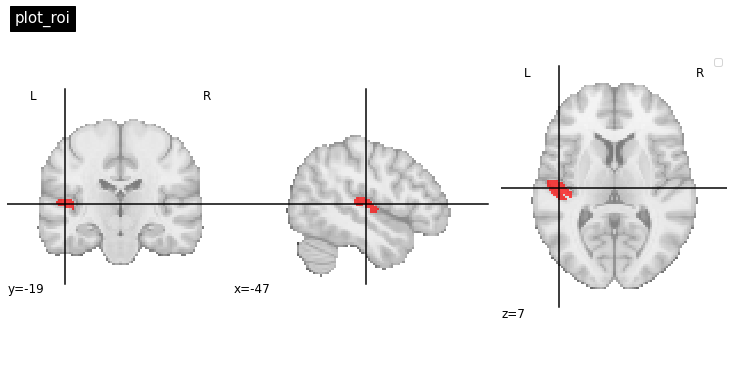

In [12]:
from nilearn import plotting
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['r', 'g', 'b'])
fig = plt.figure(figsize=(10,5))
fig = plotting.plot_roi(
    test_mask_img, title="plot_roi", figure=fig, cmap=cmap, #bg_img=haxby_anat_filename,
)
plt.legend()

In [13]:
test_mask_img = Nifti1Image(test_mask_3 + test_mask_2 + test_mask_1*1.0, affine=atlas_map.affine)


In [14]:
sample_img.get_fdata().shape
test_mask_3.shape

(76, 93, 76)

In [15]:
new_img = nib.Nifti1Image(test_mask_3*1.0, sample_img.affine)
new_img

In [16]:
# from nilearn import plotting, datasets
# from nilearn import surface
# from utils import RESULTS_DIR


# fsaverage = datasets.fetch_surf_fsaverage()

# figure, axes = plt.subplots(3, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

# regions = [REGIONS_HIGH_LEVEL_VISUAL, REGIONS_OCCIPITAL_EXCLUSIVE, REGIONS_LANGUAGE]
# names = ["high_level_visual", "low_level_visual", "language"]
# colors = ['r', 'g', 'b']

# for axis, name, region, color in zip(axes, names, regions, colors):
#     values = [label_to_value_dict[label] for label in region]
#     roi_mask = np.isin(atlas_map_data, values) * 1.0

#     curv_left_sign = np.sign(surface.load_surf_data(fsaverage.curv_left))

#     test_mask_img = Nifti1Image(roi_mask, affine=atlas_map.affine)
#     texture = surface.vol_to_surf(test_mask_img, fsaverage.pial_left, radius=1) #, radius=1
    
#     cmap = ListedColormap([color])
#     fig = plotting.plot_surf_roi(
#         fsaverage.infl_left, texture, hemi='left',
#         title=f'{name} left hemisphere', colorbar=False,
#         bg_map=curv_left_sign, cmap=cmap, axes=axis[0]
#     )
    
#     curv_right_sign = np.sign(surface.load_surf_data(fsaverage.curv_right))
#     texture = surface.vol_to_surf(test_mask_img, fsaverage.pial_right, radius=1) #, radius=1
#     fig = plotting.plot_surf_roi(
#         fsaverage.infl_right, texture, hemi='right',
#         title=f'{name} right hemisphere', colorbar=False,
#         bg_map=curv_left_sign, cmap=cmap, axes=axis[1]
#     )

# plt.tight_layout()
# plt.subplots_adjust(hspace=0, wspace=0)
# # plt.show()
# plt.savefig(os.path.join(RESULTS_DIR, f"roi_masks.png"), dpi=300)

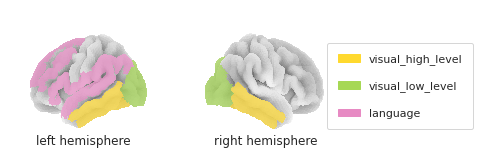

In [354]:
from nilearn import plotting, datasets
from nilearn import surface
from utils import RESULTS_DIR
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Circle

sns.set(font_scale=1.0)


MASK_PALETTE = sns.color_palette('Set2')[3:3+4][::-1][1:]
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
labels = destrieux_atlas['labels']
fsaverage = datasets.fetch_surf_fsaverage()

fig, axes = plt.subplots(1, 2, figsize=(6, 4), subplot_kw={'projection': '3d'})

for axis, hem_short, hem in zip(axes, ['L', 'R'], ['left', 'right']):
    parcellation = destrieux_atlas[f'map_{hem}']

    regions_compatible_lang = [str.encode(r[2:]) for r in REGIONS_LANGUAGE if r.startswith(hem_short)]
    pcc_regions_indices_lang = [labels.index(r) for r in regions_compatible_lang]
    pcc_labels_lang = [np.where(parcellation == index)[0] for index in pcc_regions_indices_lang]
    pcc_labels_lang = np.concatenate(pcc_labels_lang) if len(pcc_labels_lang) > 0 else []
    
    regions_compatible_vision_low = [str.encode(r[2:]) for r in REGIONS_OCCIPITAL_EXCLUSIVE if r.startswith(hem_short)]
    pcc_regions_indices_vision_low = [labels.index(r) for r in regions_compatible_vision_low]
    pcc_labels_vision_low = np.concatenate([np.where(parcellation == index)[0] for index in pcc_regions_indices_vision_low])
    
    regions_compatible_vision_high = [str.encode(r[2:]) for r in REGIONS_HIGH_LEVEL_VISUAL if r.startswith(hem_short)]
    pcc_regions_indices_vision_high = [labels.index(r) for r in regions_compatible_vision_high]
    pcc_labels_vision_high = np.concatenate([np.where(parcellation == index)[0] for index in pcc_regions_indices_vision_high])
    
    # Transform ROI indices in ROI map
    roi_map = np.zeros(parcellation.shape[0], dtype=int)
    roi_map[pcc_labels_vision_high] = 1
    roi_map[pcc_labels_vision_low] = 2
    roi_map[pcc_labels_lang] = 3

    cmap = ListedColormap(MASK_PALETTE) if hem == 'left' else ListedColormap(MASK_PALETTE[:2])
    plotting.plot_surf_roi(
        fsaverage[f'pial_{hem}'],
        roi_map=roi_map,
        hemi=hem,
        view='lateral', #anterior #[270.0, 90.0]
        bg_map=fsaverage[f'sulc_{hem}'],
        bg_on_data=True,
        cmap=cmap,
        title=f'{hem}',
        axes=axis,
        # alpha=0.5,
    )
    
names = ["visual_high_level", "visual_low_level", "language"]
# legend_elements = [Line2D([0], [0], marker='o', color='g', label=label, markerfacecolor=color, markersize=20) for color, label in zip(MASK_PALETTE, names)]
legend_elements = [Circle((0, 0), radius=5, color=color, label=label) for color, label in zip(MASK_PALETTE, names)]
axes[0].set_title('left hemisphere', pad=0, y=0.1)
axes[-1].set_title('right hemisphere', pad=0, y=0.1)
axes[0].set_facecolor('w')
axes[-1].set_facecolor('w')

lgd = axes[-1].legend(handles=legend_elements, labelspacing = 1.5, borderpad=1, bbox_to_anchor=(1.9, 0.8), facecolor='w') #
# plt.subplots_adjust(hspace=0, bottom=0)
# plt.tight_layout(pad=-100)
# fig.set_size_inches(18.5, 8, forward=True)
plt.savefig(os.path.join(RESULTS_DIR, f"roi_masks.png"), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [274]:
# !wget https://github.com/ColeLab/ColeAnticevicNetPartition/raw/master/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR.dlabel.nii
# !wget ftp://surfer.nmr.mgh.harvard.edu/pub/data/Yeo_JNeurophysiol11_MNI152.zip
!wget https://raw.githubusercontent.com/ColeLab/ColeAnticevicNetPartition/master/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt

--2024-02-04 20:10:05--  https://raw.githubusercontent.com/ColeLab/ColeAnticevicNetPartition/master/CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53483 (52K) [text/plain]
Saving to: ‘CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt’

CortexSubcortex_Col 100%[===================>]  52.23K  --.-KB/s    in 0.03s   

2024-02-04 20:10:05 (1.64 MB/s) - ‘CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt’ saved [53483/53483]



In [194]:
atlas_ji = nib.load('CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR.dlabel.nii')

In [262]:
from nibabel import cifti2
cifti = nib.load('CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_netassignments_LR.dlabel.nii')
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header

img = cifti2.Cifti2Image(cifti_data, header=cifti_hdr, nifti_header=nifti_hdr)
# img.to_filename('test.image')


In [261]:
def volume_from_cifti(data, axis):
    assert isinstance(axis, nib.cifti2.BrainModelAxis)
    data = data.T[axis.volume_mask]                          # Assume brainmodels axis is last, move it to front
    volmask = axis.volume_mask                               # Which indices on this axis are for voxels?
    vox_indices = tuple(axis.voxel[axis.volume_mask].T)      # ([x0, x1, ...], [y0, ...], [z0, ...])
    vol_data = np.zeros(axis.volume_shape + data.shape[1:],  # Volume + any extra dimensions
                        dtype=data.dtype)
    vol_data[vox_indices] = data                             # "Fancy indexing"
    return nib.Nifti1Image(vol_data, axis.affine)             # Add affine for spatial interpretation

axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]
atlas_nifti = volume_from_cifti(cifti_data, axes[1])

In [258]:
structs = list(axes[1].iter_structures())
ax_cortex = structs[:2]
ax_cortex

new_ax = axes[1]
new_ax.volume_mask.shape

(91282,)

In [341]:
ji_conversion = pd.read_csv('CortexSubcortex_ColeAnticevic_NetPartition_wSubcorGSR_parcels_LR_LabelKey.txt', delimiter='\t')
# print(ji_conversion.columns)
glasser_labels = ji_conversion[ji_conversion.NETWORK == "Language"].GLASSERLABELNAME.dropna().unique()
print(glasser_labels)

glasser_label_to_idx = pd.read_csv('HCP-MMP1_on_MNI152_ICBM2009a_nlin.txt', delimiter=' ', names=['idx', 'label'], index_col=1)
glasser_label_to_idx.loc['L_V3B_ROI'].idx

['L_55b_ROI' 'L_PSL_ROI' 'L_SFL_ROI' 'L_STV_ROI' 'L_44_ROI' 'L_45_ROI'
 'L_IFJa_ROI' 'L_IFSp_ROI' 'L_STGa_ROI' 'L_A5_ROI' 'L_STSda_ROI'
 'L_STSdp_ROI' 'L_TPOJ1_ROI' 'L_TGv_ROI' 'R_55b_ROI' 'R_SFL_ROI'
 'R_45_ROI' 'R_IFJa_ROI' 'R_STGa_ROI' 'R_A5_ROI' 'R_STSdp_ROI'
 'R_TPOJ1_ROI' 'R_TGv_ROI']


19

In [345]:
atlas_hcp = nib.load('HCP-MMP1_on_MNI152_ICBM2009a_nlin.nii.gz')
hcp_resampled = resample_to_img(atlas_hcp, sample_img)

atlas_data = hcp_resampled.get_fdata().round().astype(np.int32)
atlas_data.shape
# hcp_converted = nib.as_closest_canonical(atlas_hcp)
# view_img(hcp_converted)

(76, 93, 76)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/plotting/html_document.py:65: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



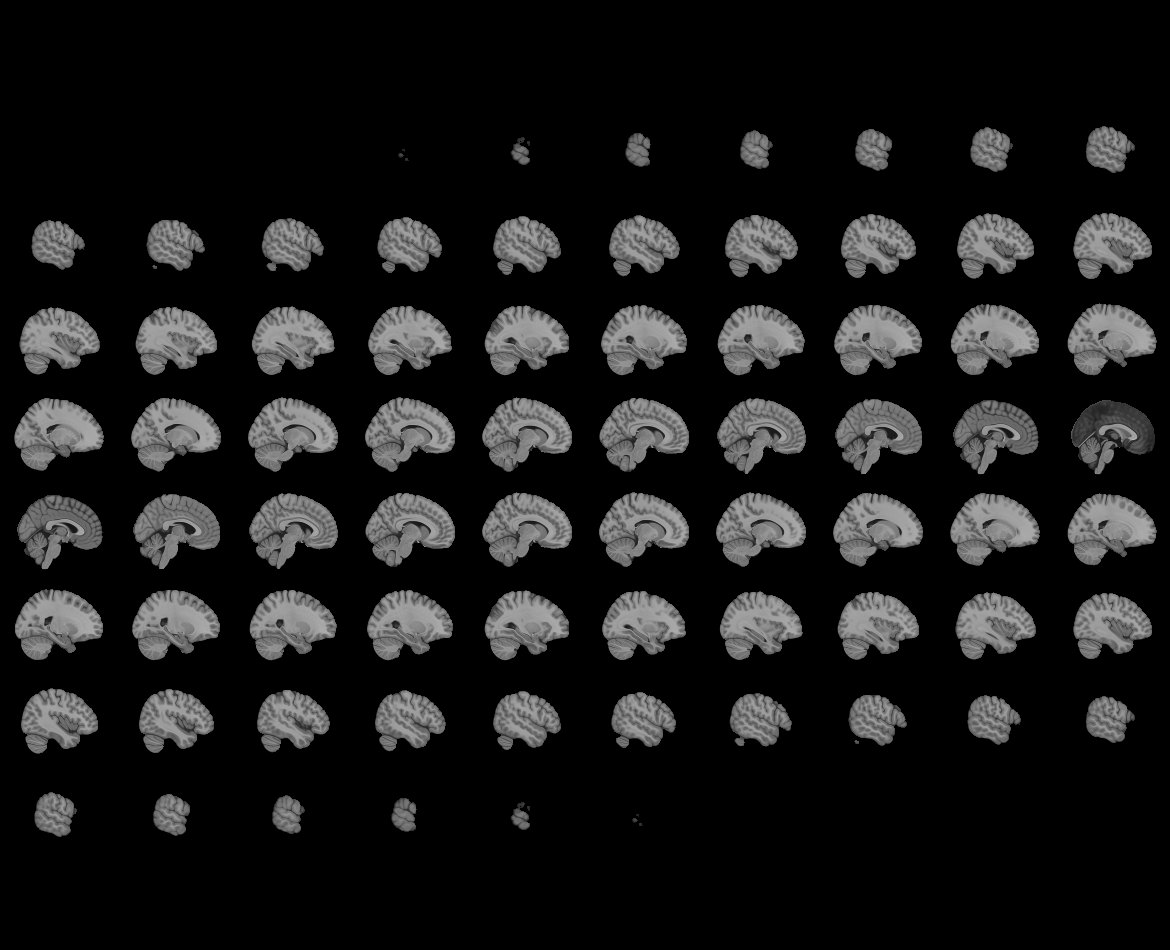
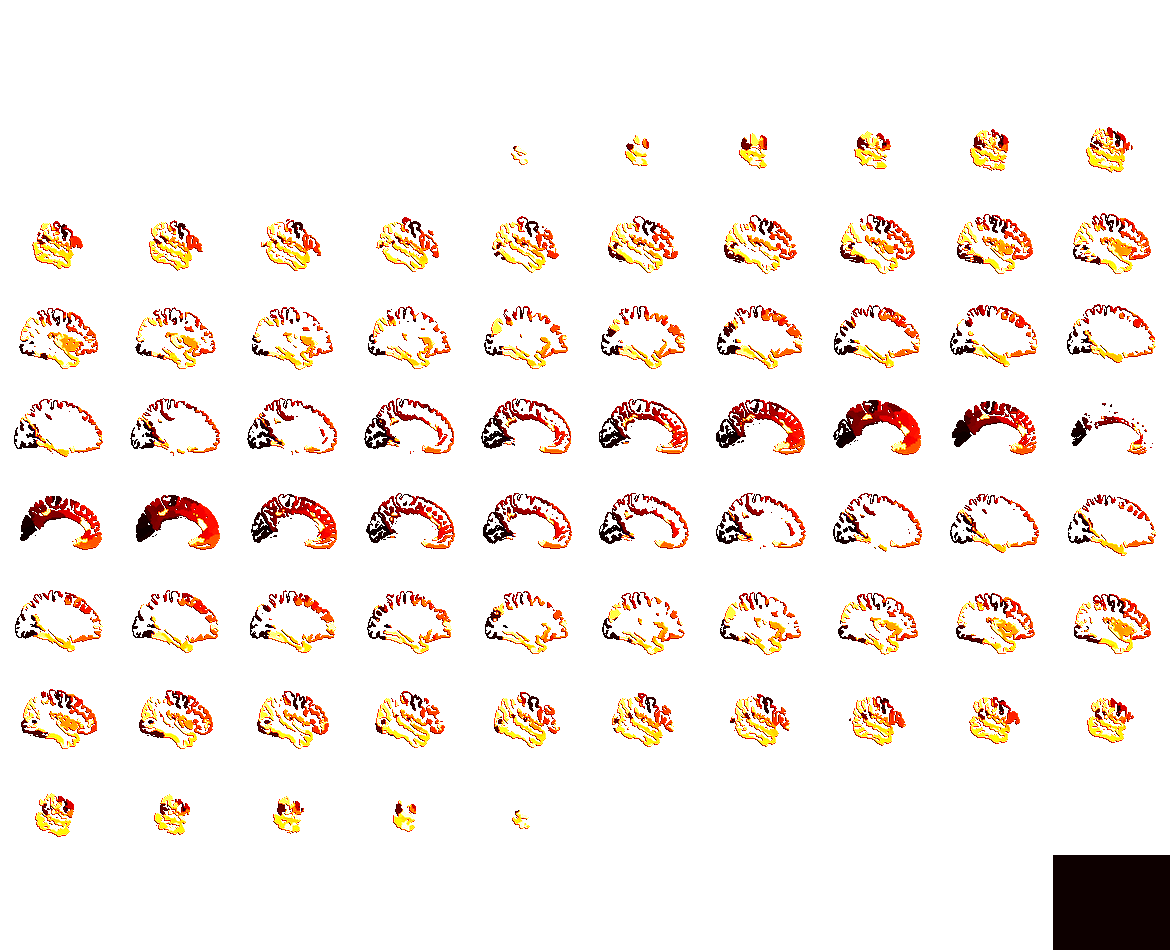

In [337]:
view_img(hcp_resampled)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/plotting/html_document.py:65: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



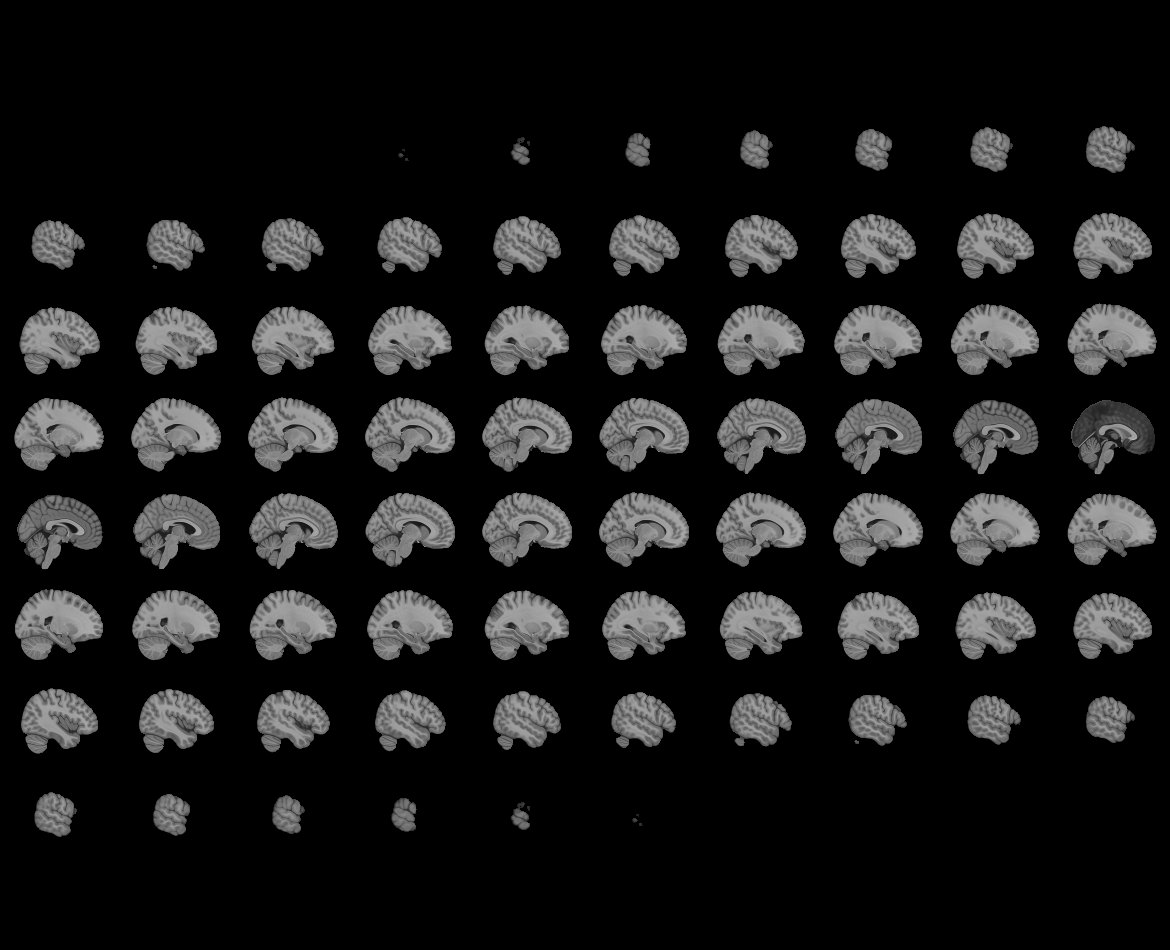
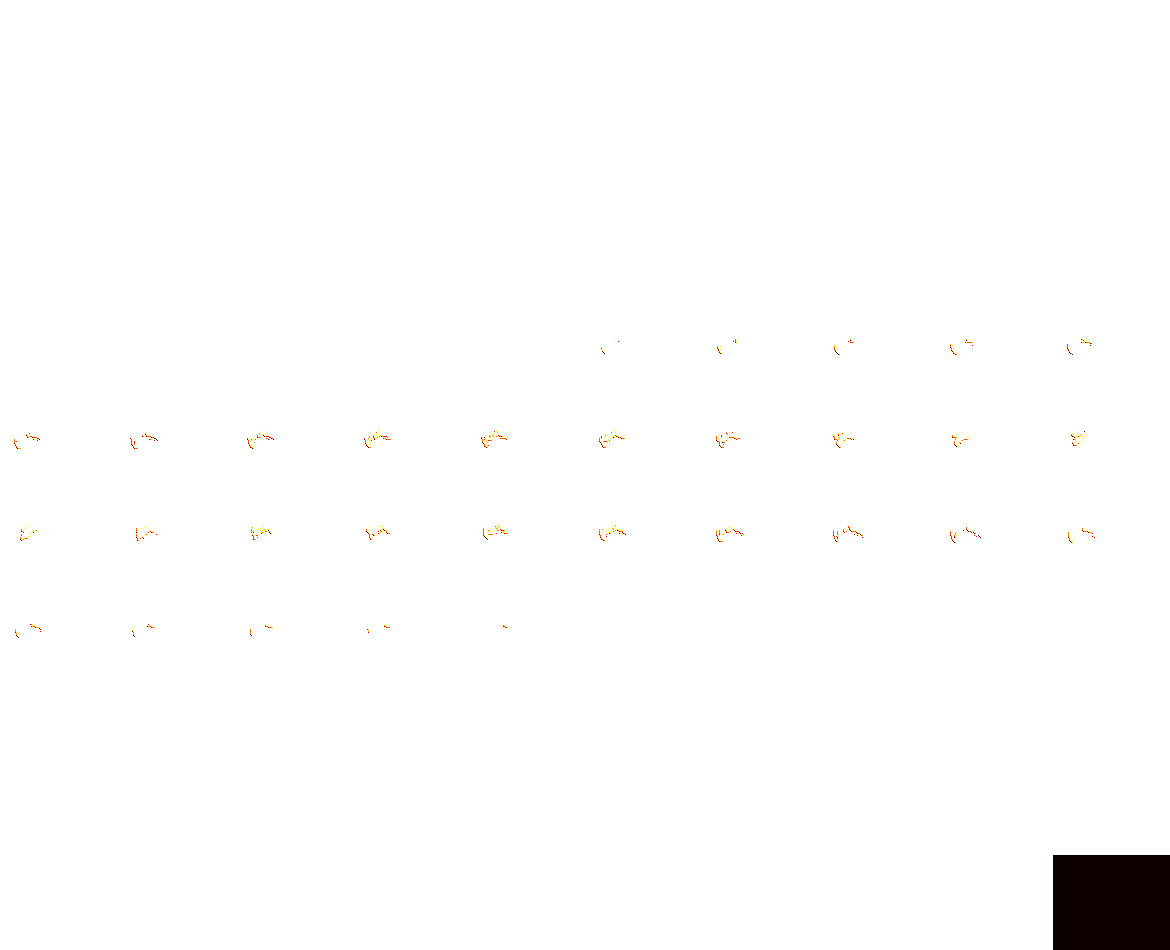

In [353]:
test_mask = np.isin(atlas_data, 1)
test_mask_img = Nifti1Image(test_mask*1.0, affine=hcp_resampled.affine)
# plotting.plot_roi()
# fig = plt.figure()
# fig = plotting.plot_roi(
#     test_mask_img, title="plot_roi", figure=fig, cmap=cmap, #bg_img=haxby_anat_filename,
# )
view_img(test_mask_img)

## Schaefer atlas

In [161]:
from nilearn.datasets import fetch_atlas_schaefer_2018
atlas_schaefer = fetch_atlas_schaefer_2018(yeo_networks=17, n_rois=100)
atlas_schaefer.keys()
atlas_schaefer['labels']
atlas_schaefer.labels = np.insert(atlas_schaefer.labels, 0, "Background")
print(atlas_schaefer['labels'])
label_to_idx_dict = {label: idx for idx, label in enumerate(atlas_schaefer['labels'])}

[b'Background' b'17Networks_LH_VisCent_ExStr_1'
 b'17Networks_LH_VisCent_ExStr_2' b'17Networks_LH_VisCent_Striate_1'
 b'17Networks_LH_VisCent_ExStr_3' b'17Networks_LH_VisPeri_ExStrInf_1'
 b'17Networks_LH_VisPeri_StriCal_1' b'17Networks_LH_VisPeri_ExStrSup_1'
 b'17Networks_LH_SomMotA_1' b'17Networks_LH_SomMotA_2'
 b'17Networks_LH_SomMotB_Aud_1' b'17Networks_LH_SomMotB_S2_1'
 b'17Networks_LH_SomMotB_S2_2' b'17Networks_LH_SomMotB_Cent_1'
 b'17Networks_LH_DorsAttnA_TempOcc_1' b'17Networks_LH_DorsAttnA_ParOcc_1'
 b'17Networks_LH_DorsAttnA_SPL_1' b'17Networks_LH_DorsAttnB_PostC_1'
 b'17Networks_LH_DorsAttnB_PostC_2' b'17Networks_LH_DorsAttnB_PostC_3'
 b'17Networks_LH_DorsAttnB_FEF_1' b'17Networks_LH_SalVentAttnA_ParOper_1'
 b'17Networks_LH_SalVentAttnA_Ins_1' b'17Networks_LH_SalVentAttnA_Ins_2'
 b'17Networks_LH_SalVentAttnA_ParMed_1'
 b'17Networks_LH_SalVentAttnA_FrMed_1'
 b'17Networks_LH_SalVentAttnB_PFCl_1'
 b'17Networks_LH_SalVentAttnB_PFCmp_1' b'17Networks_LH_LimbicB_OFC_1'
 b'17Networks

[b'17Networks_LH_VisCent_ExStr_1', b'17Networks_LH_VisCent_ExStr_2', b'17Networks_LH_VisCent_Striate_1', b'17Networks_LH_VisCent_ExStr_3', b'17Networks_RH_VisCent_ExStr_1', b'17Networks_RH_VisCent_ExStr_2', b'17Networks_RH_VisCent_ExStr_3']
[b'17Networks_LH_VisPeri_ExStrInf_1', b'17Networks_LH_VisPeri_StriCal_1', b'17Networks_LH_VisPeri_ExStrSup_1', b'17Networks_RH_VisPeri_StriCal_1', b'17Networks_RH_VisPeri_ExStrInf_1', b'17Networks_RH_VisPeri_ExStrSup_1']
[b'17Networks_LH_VisPeri_ExStrInf_1', b'17Networks_LH_VisPeri_StriCal_1', b'17Networks_LH_VisPeri_ExStrSup_1', b'17Networks_RH_VisPeri_StriCal_1', b'17Networks_RH_VisPeri_ExStrInf_1', b'17Networks_RH_VisPeri_ExStrSup_1']


/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/plotting/html_document.py:65: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



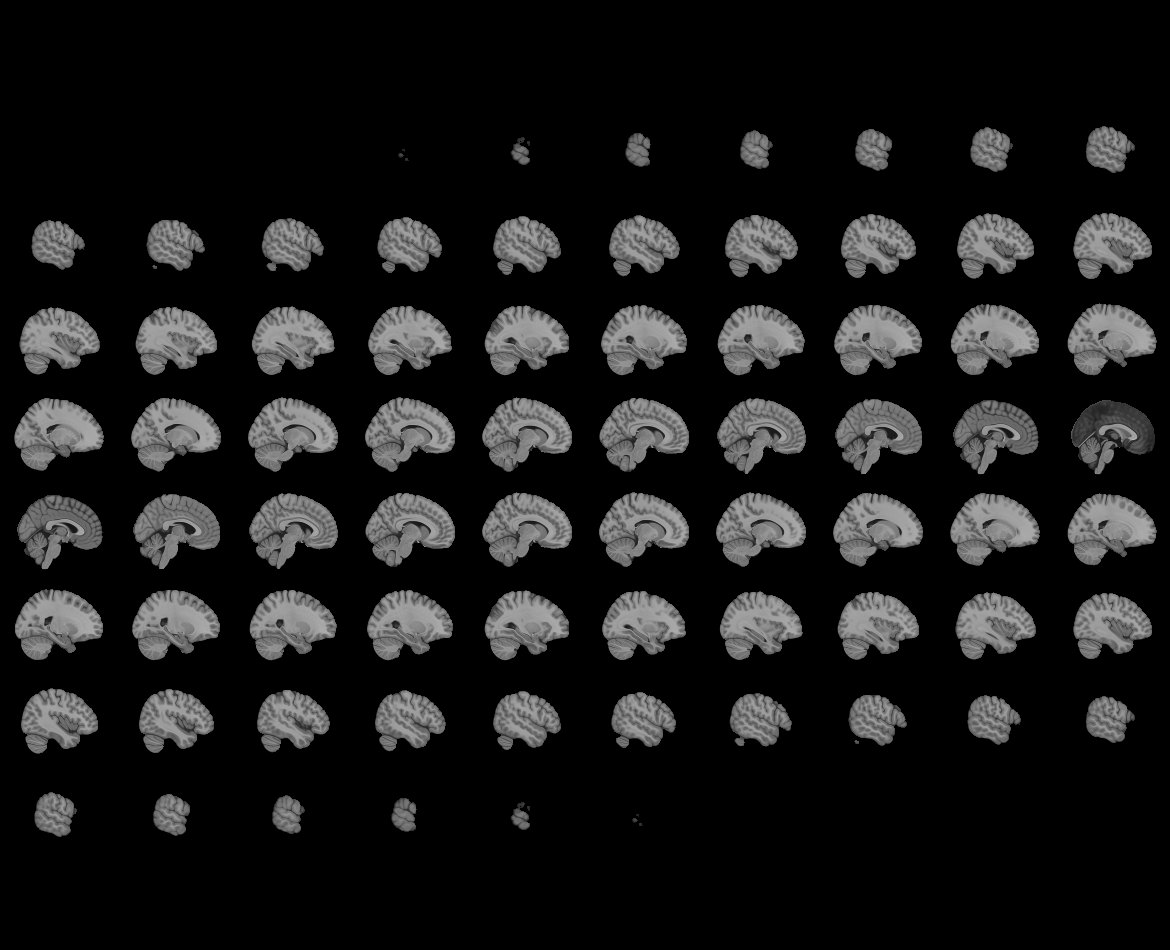
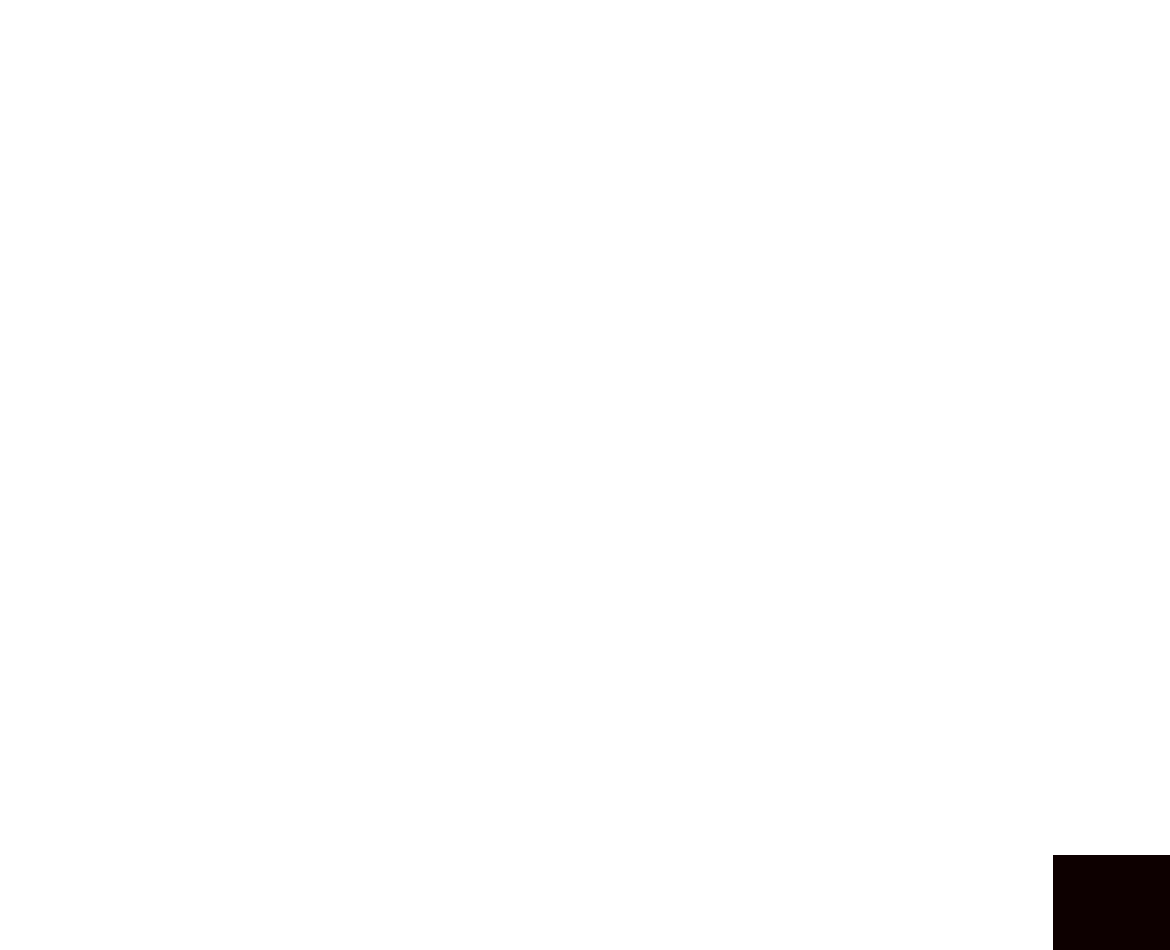

In [165]:
labels_central = [l for l in atlas_schaefer['labels'] if 'VisCent' in str(l)]
print(labels_central)
labels_periph = [l for l in atlas_schaefer['labels'] if 'VisPeri' in str(l)]
print(labels_periph)
labels_default = [l for l in atlas_schaefer['labels'] if 'DefaultB' in str(l)]
print(labels_periph)

ids = [label_to_idx_dict[label] for label in labels_default]
atlas_map = nib.load(atlas_schaefer.maps)
atlas_map_data = atlas_map.get_fdata()

roi_mask = np.isin(atlas_map_data, ids)
roi_mask_img = Nifti1Image(roi_mask*1.0, affine=atlas_map.affine)
view_img(roi_mask_img)

In [133]:
np.unique(nib.load(atlas_schaefer['maps']).get_fdata())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [115]:
print(nib.load(atlas_schaefer['maps']).get_fdata().shape)
resampled = resample_to_img(atlas_schaefer['maps'], sample_img)
resampled.get_fdata().shape

(182, 218, 182)


(76, 93, 76)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/nilearn/plotting/html_document.py:65: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn(



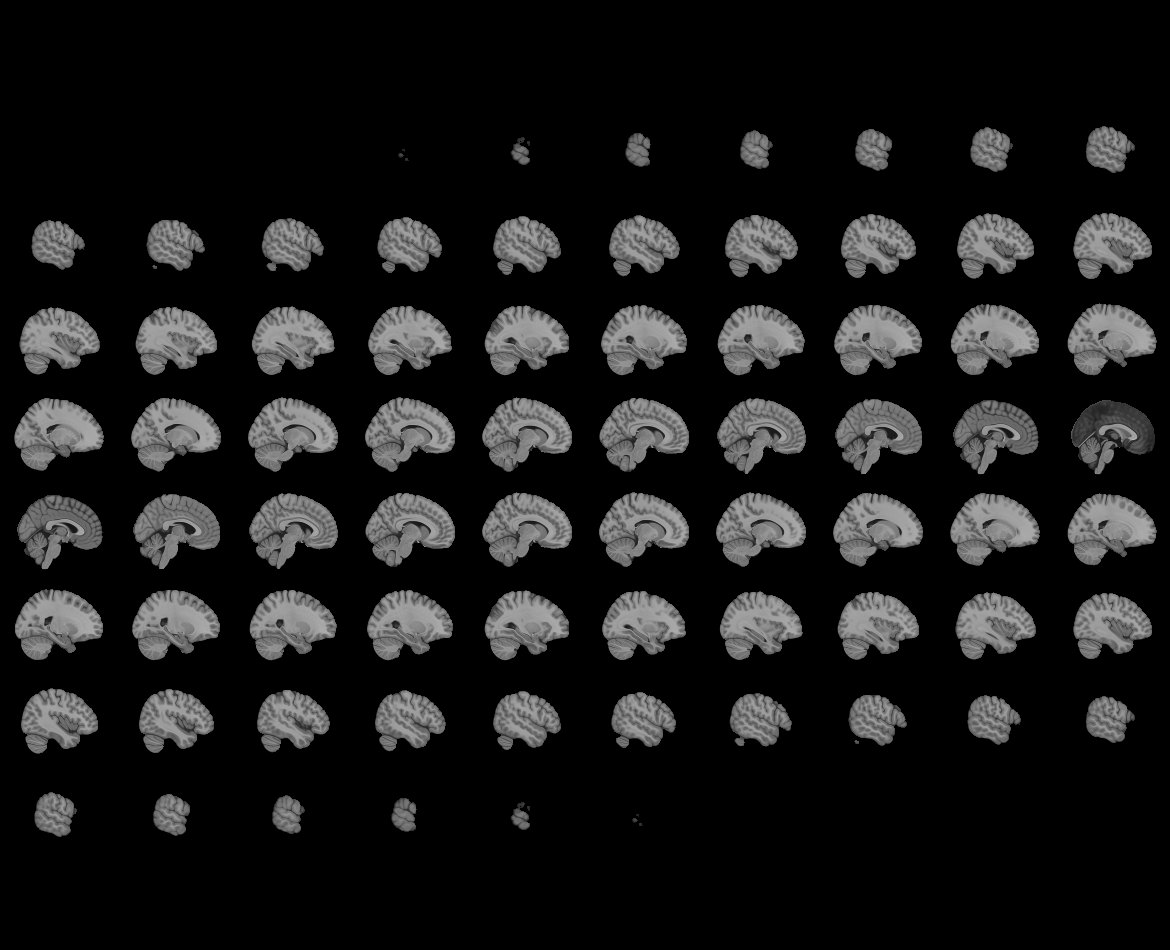
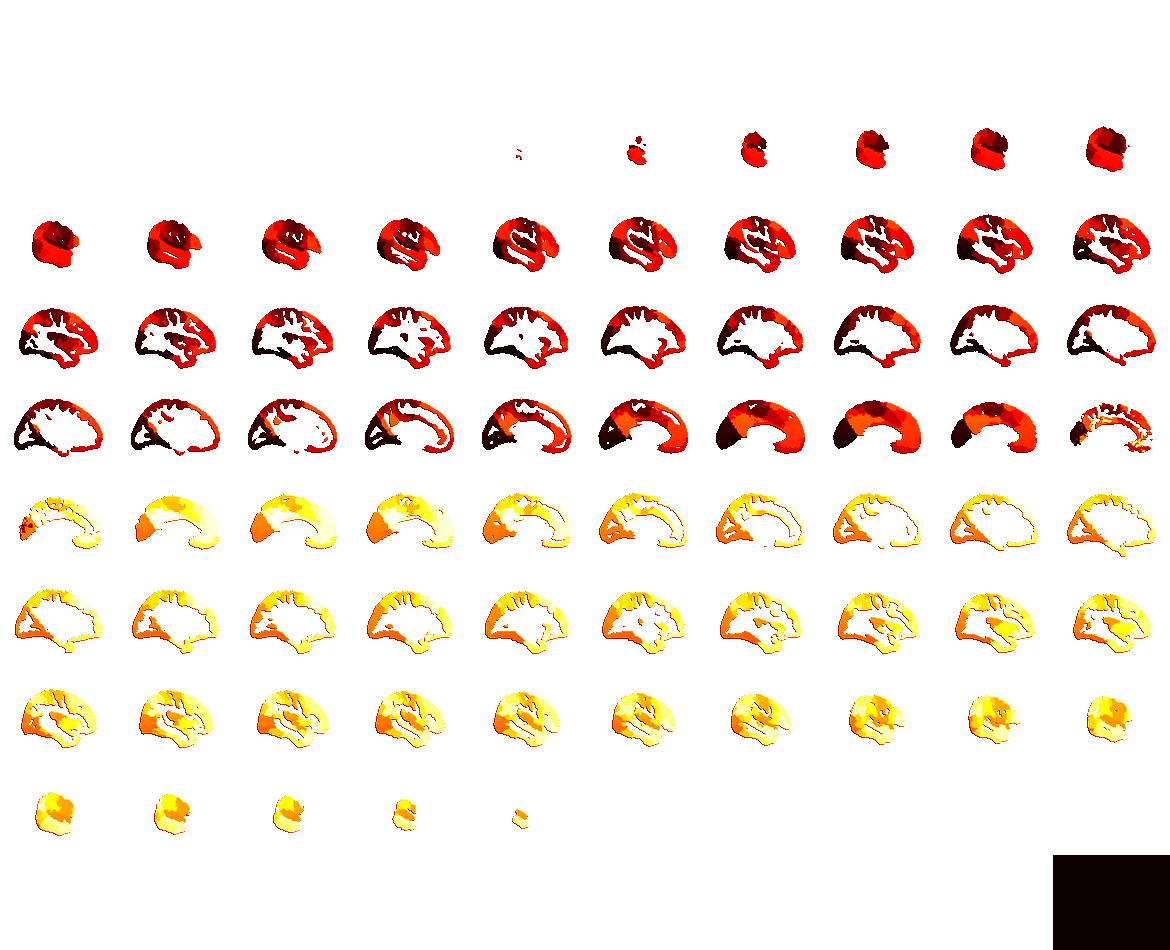

In [116]:
view_img(resampled)

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



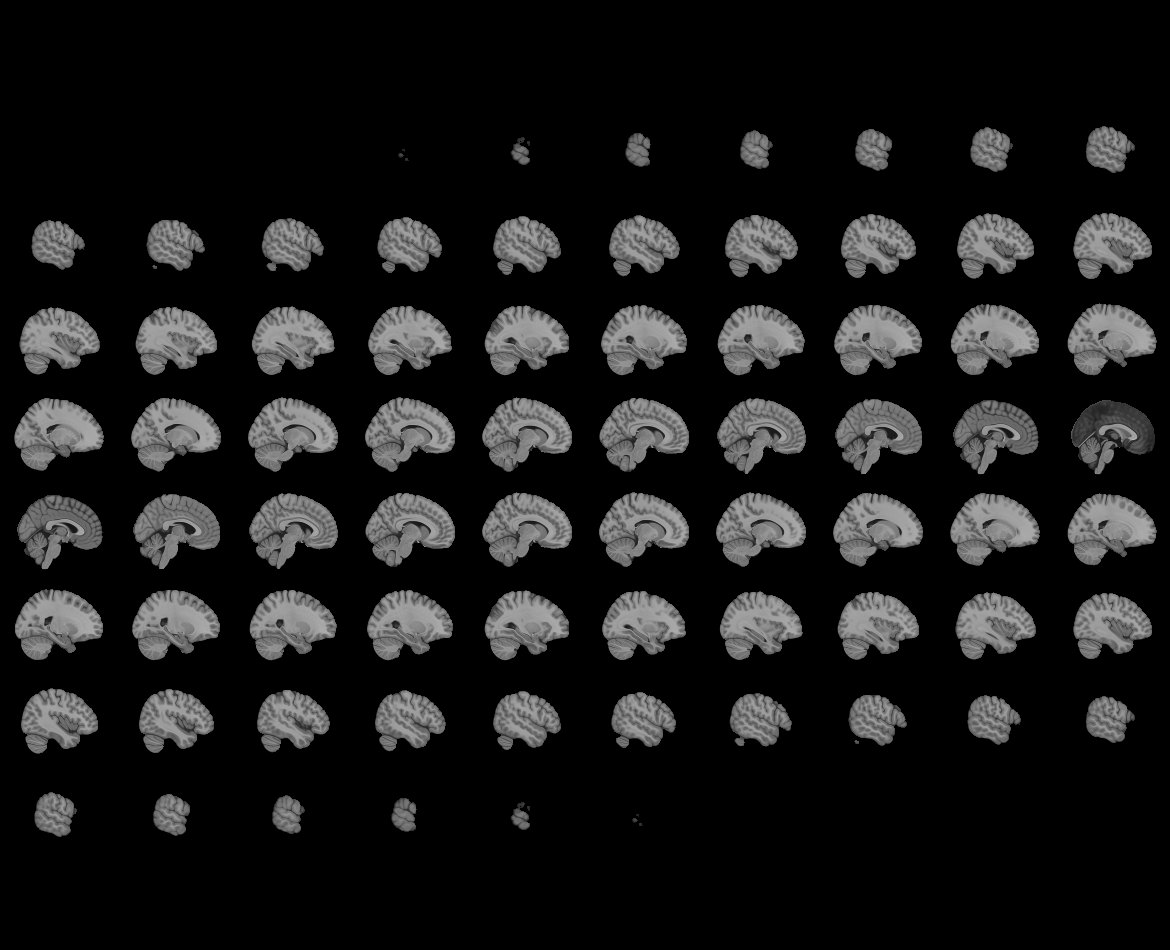
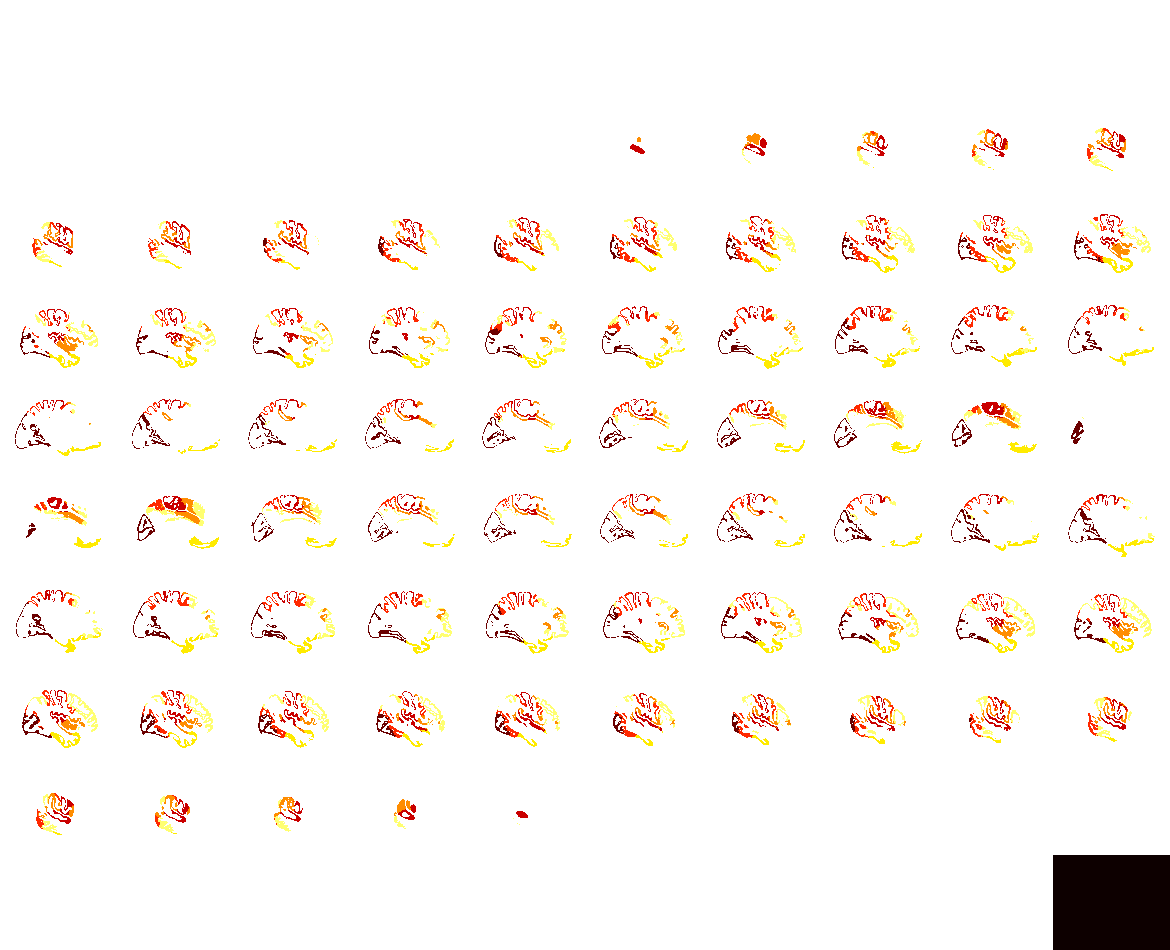

In [87]:
view_img(nib.load(atlas_yeo['thin_7']))